In [2]:
from datetime import datetime

from RadarFilterRainNet3DDataset import RadarFilterRainNetDataset
import model
from plotting import plot_images
from torch.utils.data import DataLoader


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

train_dataset = RadarFilterRainNetDataset(
    img_dir='/raid/heavyrain_dataset/RadarData_18',
    return_original=True,
    transform=model.radar_transform,
    inverse_transform=model.radar_inverseTransform
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True
)

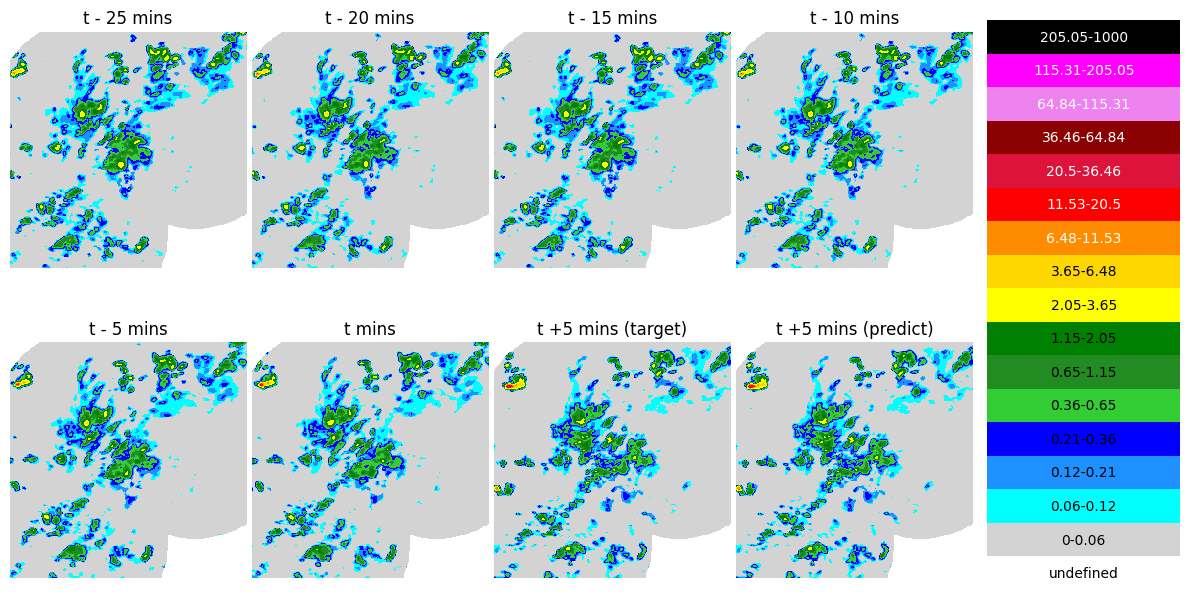

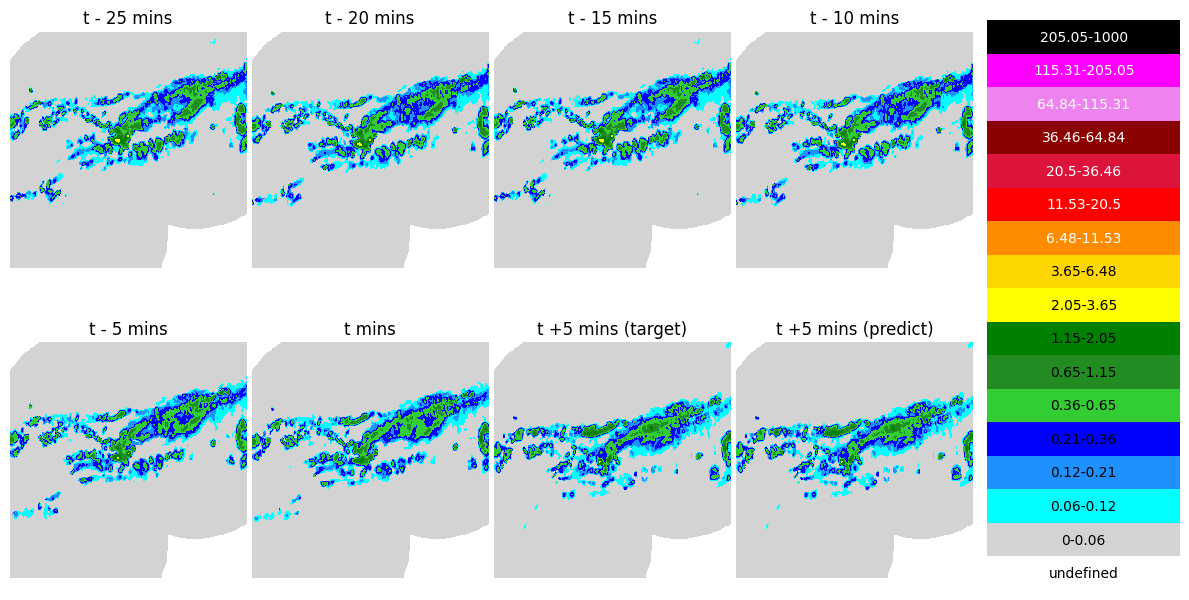

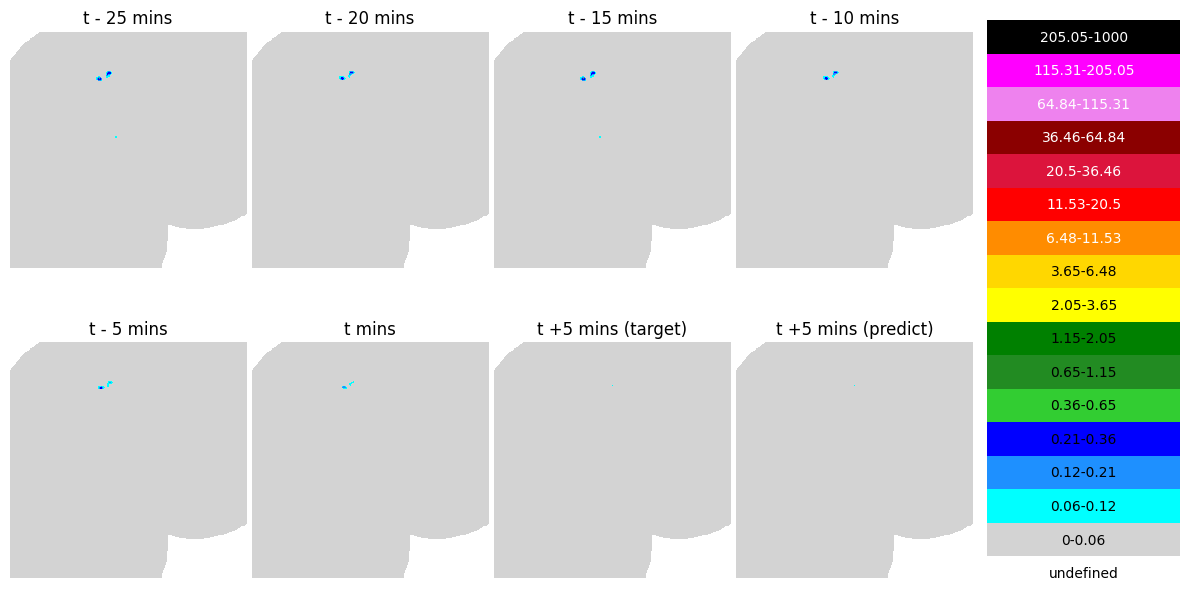

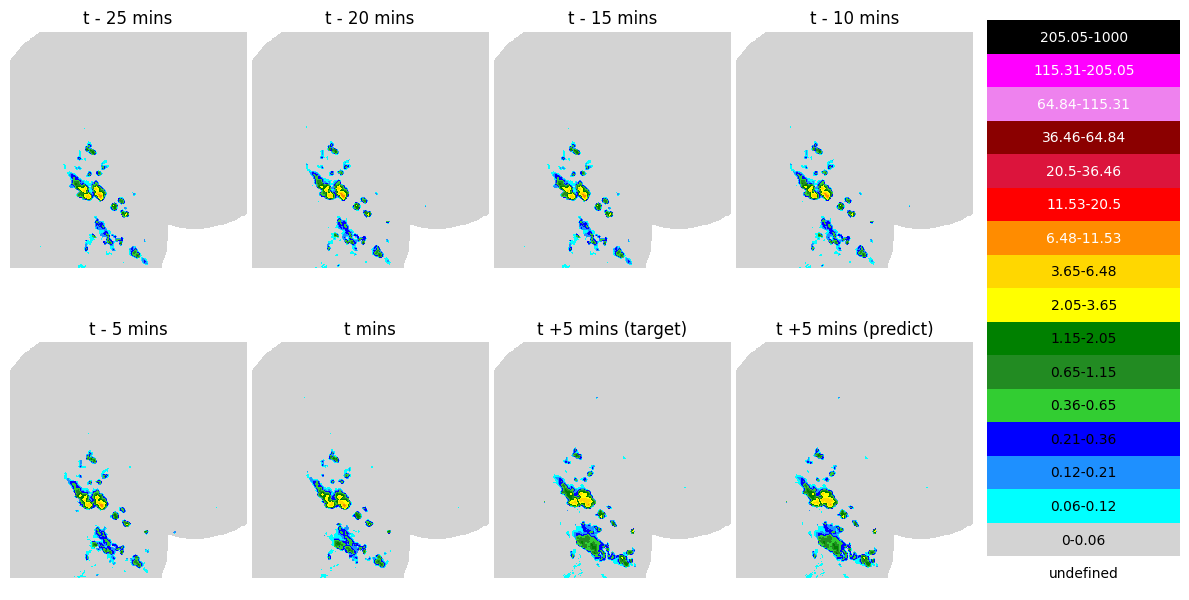

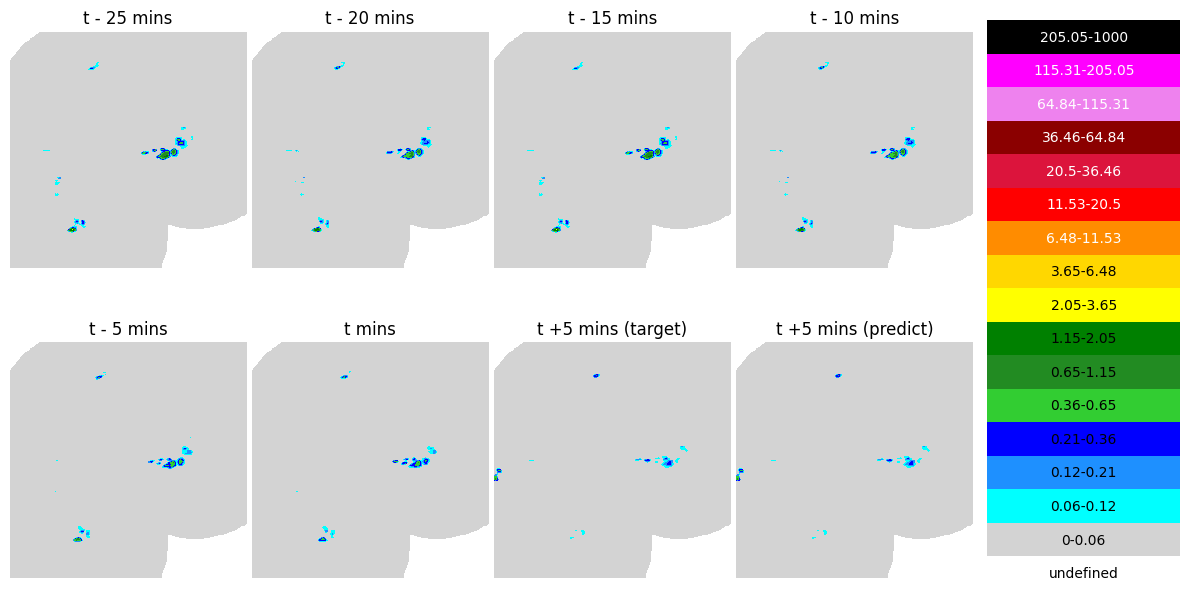

KeyboardInterrupt: Interrupted by user

In [3]:

counter=0
for batch_num, (inputs, target, original_target) in enumerate(train_dataloader, 1):
    counter +=1
    target = model.radar_inverseTransform(target)
    inputs = model.radar_inverseTransform(inputs)
    plot = plot_images(
        [inputs[0,inputs.shape[1]-1],inputs[0,inputs.shape[1]-2],inputs[0,inputs.shape[1]-1],inputs[0,inputs.shape[1]-2],inputs[0,inputs.shape[1]-3],inputs[0,inputs.shape[1]-4] ,target[0][0],original_target[0][0]],
        2,
        4,
        1,
        batch_num,
        'test',
        'test_visualization',
        save_image=False)
    plot.show()
    # wait for user inputs
    input("Press Enter to continue...")
    plot.close()
    if counter >= 100:
        break
